# J Viswaksena
# AM.EN.U4AIE21035

### Q1. Read the image given along with this lab sheet. Convert it into gray scale and plot it. 

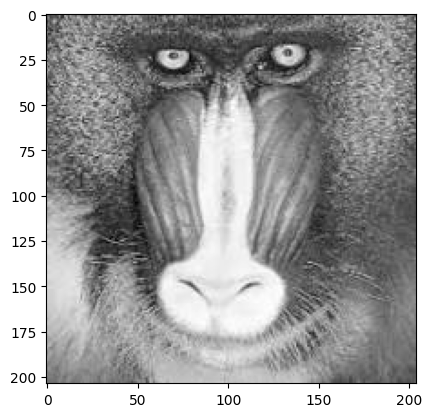

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

image = cv.imread("./images.jpeg", cv.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

In [6]:
image.shape

(204, 204)

### Q2. Apply thresholding to the converted image. Try changing the threshold value and plot the results. What would be the ideal threshold value? 

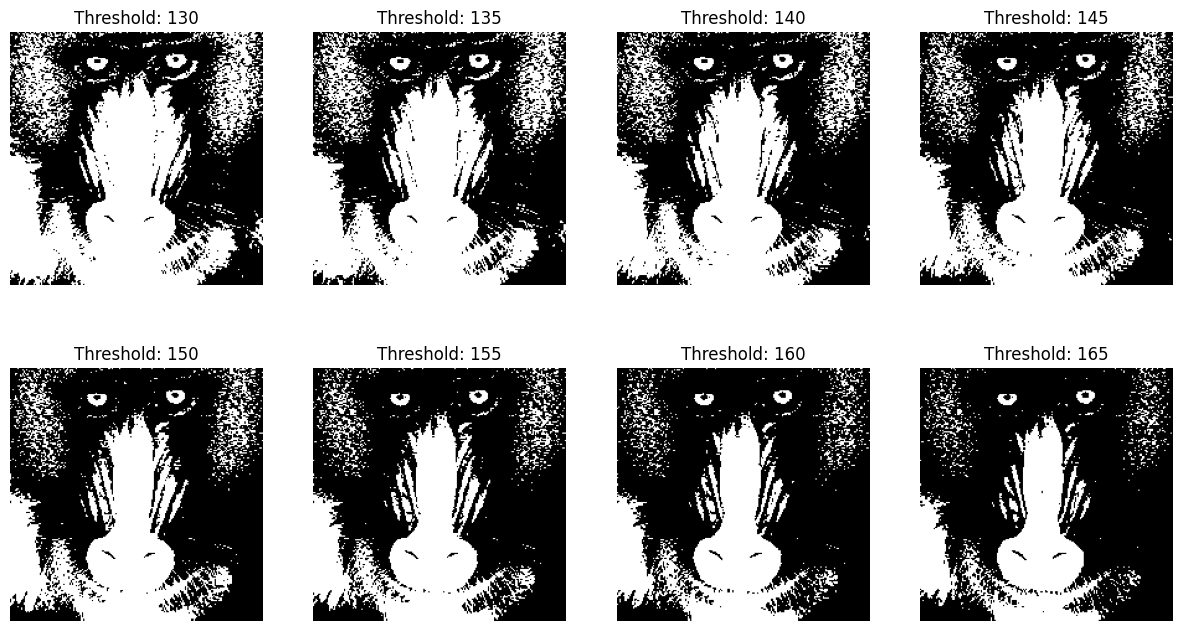

In [7]:
def segment(image, thresh):
    ans = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j]>thresh:
                ans[i,j] = 255
    return ans


num_rows = 2
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
T = 140
for i, ax in enumerate(axes.flatten()):
    threshold_value = T + (-10 + 5 * i)
    ax.imshow(segment(image, threshold_value), cmap='gray')
    ax.set_title('Threshold: {}'.format(threshold_value))
    ax.axis('off')

plt.show()


### Q3. Now try multiple thresholds to segment the image into more number of segments. When do you think this method can give good results? 

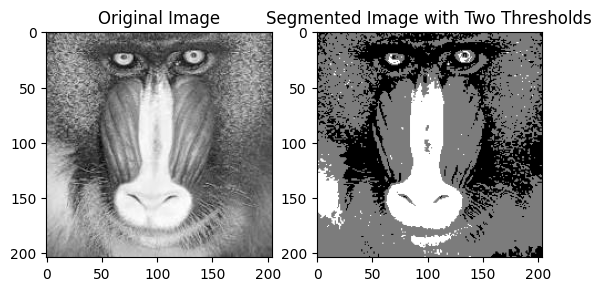

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def segment_with_two_thresholds(image, thresh_low, thresh_high):
    ans = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] < thresh_low:
                ans[i, j] = 50  
            elif thresh_low <= image[i, j] <= thresh_high:
                ans[i, j] = 150  
            else:
                ans[i, j] = 255  
    return ans


thresh_low = 100
thresh_high = 200

segmented_image = segment_with_two_thresholds(image, thresh_low, thresh_high)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image with Two Thresholds')

plt.show()


### Q4. Consider the same image and apply region growing technique and perform segmentation by giving the following parameters as input. 

Initial seed point 

Threshold, t 

Neighbour (4 or 8) 

### Q5. Try changing each of the above parameters and plot the results. Which set of parameters is giving you the best result? 

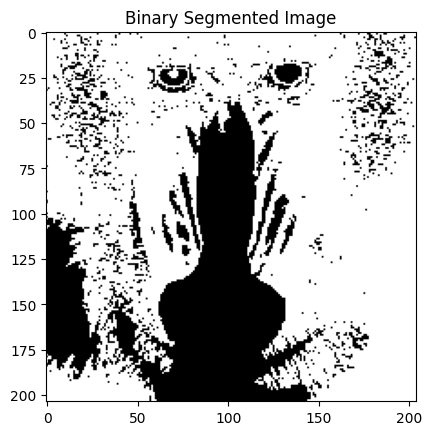

In [10]:
import cv2
import numpy as np
from queue import Queue
import matplotlib.pyplot as plt

def region_growing(image, seed, threshold, connectivity):
    rows, cols = image.shape
    segmented = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=bool)

    queue = Queue()
    queue.put(seed)
    visited[seed] = True

    while not queue.empty():
        current_pixel = queue.get()

        neighbors = get_neighbors(current_pixel, rows, cols, connectivity)

        for neighbor in neighbors:
            if not visited[neighbor] and is_similar(image, seed, neighbor, threshold):
                segmented[neighbor] = 255  
                visited[neighbor] = True
                queue.put(neighbor)

    return segmented

def get_neighbors(pixel, rows, cols, connectivity):
    x, y = pixel
    if connectivity == 4:
        return [(x - 1, y), (x, y - 1), (x, y + 1), (x + 1, y)]
    elif connectivity == 8:
        return [(x - 1, y), (x, y - 1), (x, y + 1), (x + 1, y), (x - 1, y - 1), (x - 1, y + 1), (x + 1, y - 1), (x + 1, y + 1)]
    else:
        raise ValueError("Invalid connectivity value. Use 4 or 8.")

def is_similar(image, seed, pixel, threshold):
    seed_value = image[seed]
    pixel_value = image[pixel]
    return np.abs(int(seed_value) - int(pixel_value)) < threshold

image_path = './images.jpeg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


seed_point = (50, 50)  
threshold_value = 60  
connectivity_type = 8

segmented_image = region_growing(original_image, seed_point, threshold_value, connectivity_type)

binary_segmented_image = cv2.threshold(segmented_image, 1, 255, cv2.THRESH_BINARY)[1]

plt.imshow(binary_segmented_image, cmap='gray')
plt.title('Binary Segmented Image')
plt.show()
